In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('results-3090.csv')
df.head()

,RNG,execs,seconds,execsps,iters,threads per block,number of blocks,dev name,dev mem rate (KHz),dev bus width (bits),dev peak mem bandwidth (GB/s)
0,CURAND,83886080000,3.500271,2.396560e+10,128,65536,GeForce RTX 3090,9751000,384,936.096,NaN
1,AES,83886080000,10.076241,8.325136e+09,128,65536,GeForce RTX 3090,9751000,384,936.096,NaN
2,CHAM,83886080000,4.145446,2.023572e+10,128,65536,GeForce RTX 3090,9751000,384,936.096,NaN
3,CURAND,83886080000,3.420561,2.452407e+10,128,65536,GeForce RTX 3090,9751000,384,936.096,NaN
4,AES,83886080000,10.107141,8.299684e+09,128,65536,GeForce RTX 3090,9751000,384,936.096,NaN


In [2]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

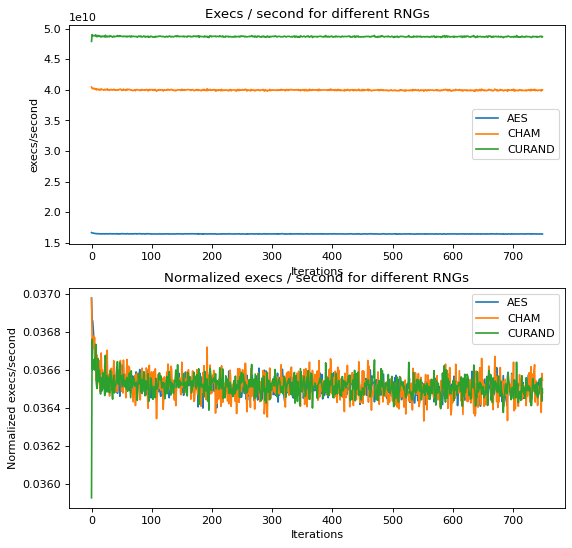

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8), dpi=80)
axs = fig.subplots(2, 1)


for name, group in df.groupby('RNG'):
    seconds = group['execsps'].to_numpy() * 2
    axs[0].plot(np.arange(len(group)), seconds, label=name)
axs[0].set(xlabel='Iterations', ylabel='execs/second', title='Execs / second for different RNGs')
axs[0].legend()


for name, group in df.groupby('RNG'):
    seconds = group['execsps'].to_numpy() * 2
    axs[1].plot(np.arange(len(group)), seconds / np.linalg.norm(seconds), label=name)
axs[1].set(xlabel='Iterations', ylabel='Normalized execs/second', title='Normalized execs / second for different RNGs')
axs[1].legend()

fig.savefig('../img/execsps-over-epoch.png')
plt.show()

<AxesSubplot:title={'center':'Executions per seond for RNG'}, xlabel='RNG', ylabel='Execs / s'>

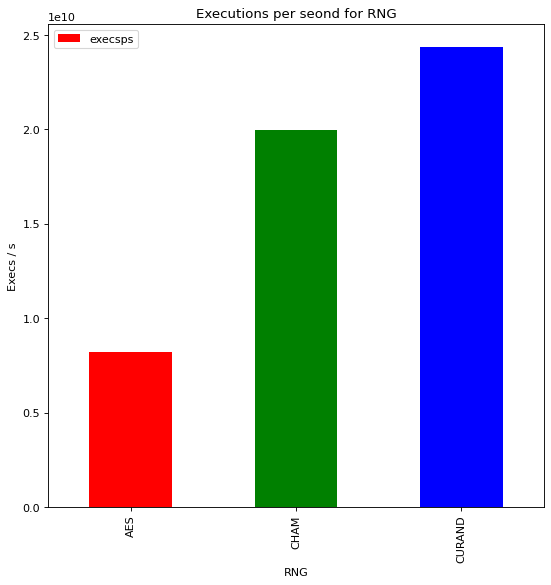

In [4]:
fig, ax = plt.subplots(figsize=(8,8), dpi=80)
fig.savefig('../img/execsps.png')
df.groupby('RNG', as_index=False).mean().plot.bar(x='RNG', y='execsps', color=['red', 'green', 'blue'], ylabel='Execs / s', title='Executions per seond for RNG', ax=ax)